# Support Vector Classifiaction 



Data Import from Kaggle
Only run this code cell for the first time, important as it sets up the Kaggle import for the dataset.

You will need a Kaggle API Token from your account to be able to use the API, you can learn how to get one from https://www.kaggle.com/docs/api

Importing Data From kaggle

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d jessicali9530/stanford-dogs-dataset
! unzip stanford-dogs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Images/n02108089-boxer/n02108089_11687.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_117.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11807.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11875.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_122.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12232.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_125.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12738.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12739.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12827.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13340.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13526.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1353.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1355.jpg  
  inflating: images/Images/n02108089-boxer/n021

Importing Librarys



In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random
from pathlib import Path
from google.colab.patches import cv2_imshow

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import keras
import tensorflow as tf

from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from sklearn.metrics import roc_curve, auc

Importing the images and appending them in to arrays


In [55]:
dir = 'images/Images'

"""Adding the breeds of dogs that we want to train"""
categories = ['n02085620-Chihuahua','n02085782-Japanese_spaniel','n02116738-African_hunting_dog']

data = []

"""Converting a 2d image to a numpy array and appending their label i.e. index along side"""
for category in categories:
  path = os.path.join(dir,category)
  label = categories.index(category)

  for img in os.listdir(path):
    imgpath = os.path.join(path,img)
    pet_img = cv2.imread(imgpath,0)
    pet_img = cv2.resize(pet_img,(100,100))
    image = np.array(pet_img).flatten()

    data.append([image, label])

"""Total number of data or images in the array"""
print(len(data))
print(data)
cv2.waitKey(0)
cv2.destroyAllWindows()


506
[[array([21, 24, 26, ..., 82, 75, 74], dtype=uint8), 0], [array([132,  83,  75, ..., 101,  97,  94], dtype=uint8), 0], [array([42, 39, 35, ..., 74, 71, 67], dtype=uint8), 0], [array([120, 116, 122, ...,  41,  31,  36], dtype=uint8), 0], [array([228, 228, 229, ..., 210, 215, 210], dtype=uint8), 0], [array([ 45,  44,  43, ..., 119, 120, 132], dtype=uint8), 0], [array([233, 224, 231, ...,  60, 102, 124], dtype=uint8), 0], [array([116, 102, 121, ..., 116, 116, 116], dtype=uint8), 0], [array([53, 57, 67, ..., 57, 57, 57], dtype=uint8), 0], [array([106, 107, 108, ..., 100, 103,  92], dtype=uint8), 0], [array([176, 183, 169, ..., 129, 190, 154], dtype=uint8), 0], [array([ 25,  27,  20, ..., 152, 132, 129], dtype=uint8), 0], [array([105, 114, 113, ..., 238, 248, 236], dtype=uint8), 0], [array([118, 118, 118, ...,  97, 107, 106], dtype=uint8), 0], [array([ 72,  71,  76, ...,  38,  88, 107], dtype=uint8), 0], [array([ 93, 100, 100, ...,  62,  62,  62], dtype=uint8), 0], [array([ 88,  79,  72

Ramdomizing the data


In [63]:
"""Randomizing the data set"""
random.shuffle(data)

In [ ]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 
              'gamma': [1,0.1,0.01,0.001,0.0001]}

grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(Xtrain, Ytrain)

print(grid.best_params_) 

In [64]:
param_grid = {'C':[1, 2, 3, 4, 10], 
              'gamma': [0.1,0.01,0.001,10,100]}

grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(Xtrain, Ytrain)

print(grid.best_params_) 

{'C': 1, 'gamma': 0.001}


Training and outputing the Prediction and Accuracy


Accuracy 0.5526315789473685
Prediction is n02085620-Chihuahua


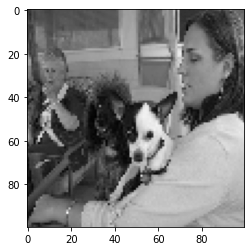

In [72]:
features = []
labels = []

for feature, label, in data:
  features.append(feature)
  labels.append(label)


"""Splitting the data set into where features and labels are the first paramaters"""
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, labels, test_size=0.3, random_state= None)

"""Fitting the model with extra parameters"""
model = SVC(C=1, kernel='poly', probability=True, gamma=0.001)
model.fit(Xtrain,Ytrain)

prediction = model.predict(Xtest)
accuracy = accuracy_score(Ytest, prediction)

print("Accuracy", accuracy)
print("Prediction is",categories[prediction[0]])

mypet = Xtest[0].reshape(100,100)
plt.imshow(mypet,cmap='gray')
plt.show()

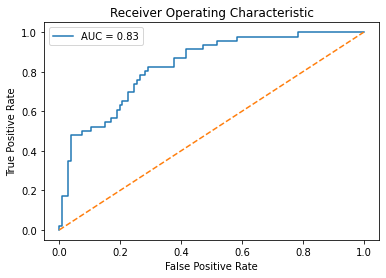

In [73]:
probabilities = model.predict_proba(Xtest)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ytest, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');